# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')
heroes_df.head()
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [3]:
heroes_df.drop(['Unnamed: 0'],axis=1,inplace=True)
heroes_df.head()
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [4]:
powers_df.isna().sum()
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




# Heroes DataFrame

## Cleaning Column Names
In looking at the overview gleaned from the .info function, we can see that the name column is not capitalized. For future readability, we'll change that to having a uppercased first letter.

In [5]:
heroes_df.rename(columns={'name':'Name'},inplace=True)

## Determining Placeholder Values
First, we should check for null values, which can be done using the .isna function. While this would usually be really helpful, in this dataset, it seems there are quite a few placeholder values used when data is unknown. To determine what these placeholder values are, we could take a look at the lines themselves, but in this case, we'll pull the unique values of each column to get a better idea of what we're looking at.

In a lot of these columns, we will also be seeing some situations where there are items that either were misspelled or capitalized oddly, which may result in some data variance. I'll be adjusting those as well, simply for better, more reliable data.

In [6]:
print(heroes_df['Gender'].unique())
heroes_df['Gender'].replace('-','Unknown / Non-Binary', inplace=True)
print(heroes_df['Gender'].unique())

['Male' 'Female' '-']
['Male' 'Female' 'Unknown / Non-Binary']


In the case of genders, I've added an unknown/non-binary option, as certain species/races may not have gender/sex standards like humans, and throwing away data due to that seemed a bit silly.

['yellow' 'blue' 'green' 'brown' '-' 'red' 'violet' 'white' 'purple'
 'black' 'grey' 'silver' 'yellow / red' 'yellow (without irises)' 'gold'
 'blue / white' 'hazel' 'green / blue' 'white / red' 'indigo' 'amber'
 'yellow / blue' 'bown']


[]

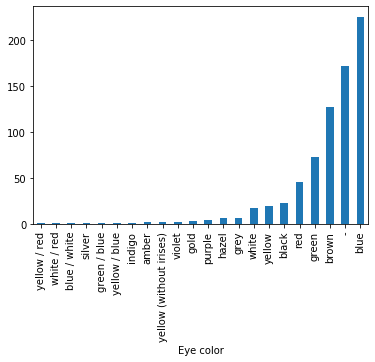

In [7]:
print(heroes_df['Eye color'].unique())
heroes_df['Eye color'].replace('bown','brown',inplace=True)
data = heroes_df.groupby('Eye color')['Eye color'].count().sort_values()
plt = data.plot(kind='bar')
plt.plot()

Upon plotting the eye colors of heroes, it appears that there is a large portion of heroes that do not have valid eye color values. This is interesting, and I, by default, have replaced those with n/a values, simply to make future cleaning easier.

['yellow' 'blue' 'green' 'brown' nan 'red' 'violet' 'white' 'purple'
 'black' 'grey' 'silver' 'yellow / red' 'yellow (without irises)' 'gold'
 'blue / white' 'hazel' 'green / blue' 'white / red' 'indigo' 'amber'
 'yellow / blue']


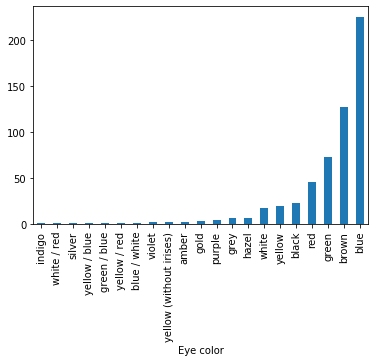

In [8]:
heroes_df['Eye color'].replace('-',np.nan,inplace=True)
data = heroes_df.groupby('Eye color')['Eye color'].count().sort_values()
plt = data.plot(kind='bar')
plt.plot()
print(heroes_df['Eye color'].unique())

[]

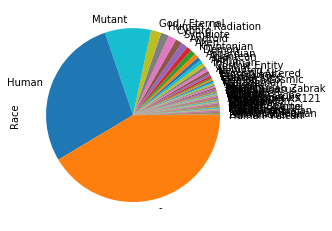

In [9]:
data = heroes_df.groupby('Race')['Race'].count().sort_values()
plt = data.plot(kind='pie')
plt.plot()

[]

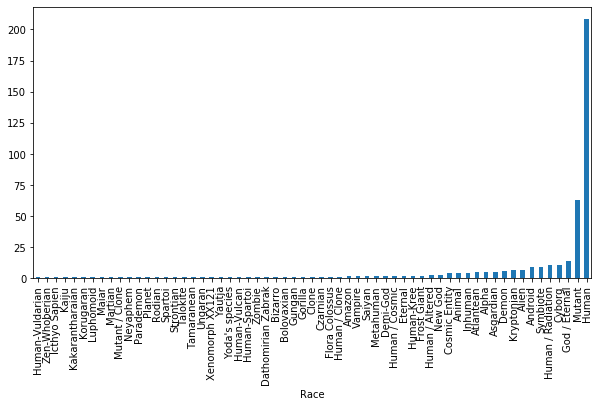

In [10]:
heroes_df['Race'].replace('-',np.nan,inplace=True)
data = heroes_df.groupby('Race')['Race'].count().sort_values()
plt = data.plot(kind='bar',figsize=(10,5))
plt.plot()

Due to the number of Null values, we will likely end up dropping this column, however, for now, we'll leave it in place.

['No Hair' 'Black' 'Blond' 'Brown' '-' 'White' 'Purple' 'Orange' 'Pink'
 'Red' 'Auburn' 'Strawberry Blond' 'black' 'Blue' 'Green' 'Magenta'
 'Brown / Black' 'Brown / White' 'blond' 'Silver' 'Red / Grey' 'Grey'
 'Orange / White' 'Yellow' 'Brownn' 'Gold' 'Red / Orange' 'Indigo'
 'Red / White' 'Black / Blue']
['No Hair' 'Black' 'Blond' 'Brown' nan 'White' 'Purple' 'Orange' 'Pink'
 'Red' 'Auburn' 'Strawberry Blond' 'Blue' 'Green' 'Magenta'
 'Brown / Black' 'Brown / White' 'Silver' 'Red / Grey' 'Grey'
 'Orange / White' 'Yellow' 'Gold' 'Red / Orange' 'Indigo' 'Red / White'
 'Black / Blue']


[]

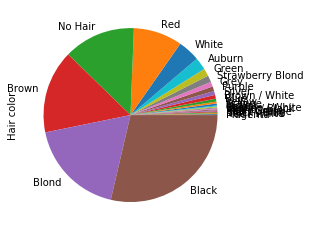

In [11]:
print(heroes_df['Hair color'].unique())
heroes_df['Hair color'].replace('-',np.nan,inplace=True)
heroes_df['Hair color'].replace('black','Black',inplace=True)
heroes_df['Hair color'].replace('blond','Blond',inplace=True)
heroes_df['Hair color'].replace('Brownn','Brown',inplace=True)
print(heroes_df['Hair color'].unique())
data = heroes_df.groupby('Hair color')['Hair color'].count().sort_values()
plt = data.plot(kind='pie')
plt.plot()

In the case of numeric values, such as height and weight, it appears that the data collectors used -99 as placeholders for height and weight, which cannot exist, as negative mass doesn't exist, and height is an absolute value as well. In these cases, we will likely end up dropping those rows. Let's see what percentage of our values are placeholders, however, as that may affect our choice.

[203.  191.  185.  -99.  193.  173.  178.  188.  180.  244.  257.  183.
 165.  163.  211.   61.  229.  213.  175.  198.  168.  170.  201.  218.
  30.5 196.  157.  226.  267.  122.  975.  142.  876.   62.5 108.  701.
 259.   79.  155.   71.  287.  234.   64.  366.  206.  305.  297.  137.
 279.   15.2 140.  160.  304.8  66. ]
count    734.000000
mean     102.254087
std      139.624543
min      -99.000000
25%      -99.000000
50%      175.000000
75%      185.000000
max      975.000000
Name: Height, dtype: float64


[]

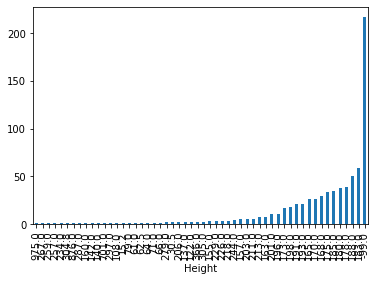

In [12]:
print(heroes_df['Height'].unique())

print(heroes_df['Height'].describe())
data = heroes_df.groupby('Height')['Height'].count().sort_values()
plt = data.plot(kind='bar')
plt.plot()

In this case, it appears that a significant portion of our values are placeholders, which unfortunately means that any attempt to fill that value with mean or median values will result in distortion of our data. Likely, we will end up dropping the rows, despite our best efforts. In the mean time, we will simply replace those values with NaN, to make future cleaning easier.

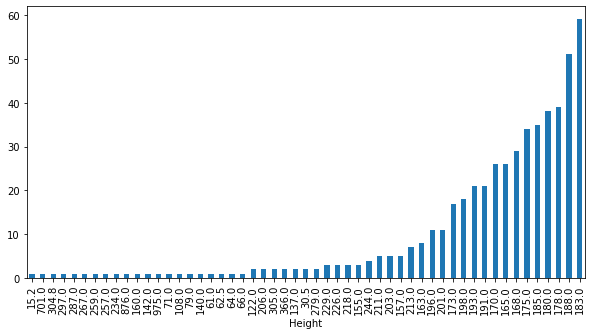

In [13]:
heroes_df['Height'].replace(-99,np.nan,inplace=True)
data = heroes_df.groupby('Height')['Height'].count().sort_values()
plt = data.plot(kind='bar',figsize=(10,5))

In [14]:
print(heroes_df['Publisher'].unique())

['Marvel Comics' 'Dark Horse Comics' 'DC Comics' 'NBC - Heroes'
 'Wildstorm' 'Image Comics' nan 'Icon Comics' 'SyFy' 'Hanna-Barbera'
 'George Lucas' 'Team Epic TV' 'South Park' 'HarperCollins' 'ABC Studios'
 'Universal Studios' 'Star Trek' 'IDW Publishing' 'Shueisha'
 'Sony Pictures' 'J. K. Rowling' 'Titan Books' 'Rebellion' 'Microsoft'
 'J. R. R. Tolkien']


['-' 'blue' 'red' 'black' 'grey' 'gold' 'green' 'white' 'pink' 'silver'
 'red / black' 'yellow' 'purple' 'orange / white' 'gray' 'blue-white'
 'orange']
[nan 'blue' 'red' 'black' 'gray' 'gold' 'green' 'white' 'pink' 'silver'
 'red / black' 'yellow' 'purple' 'orange / white' 'blue-white' 'orange']


[]

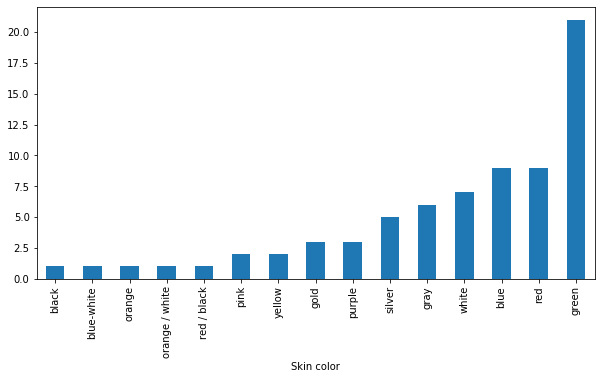

In [15]:
print(heroes_df['Skin color'].unique())
heroes_df['Skin color'].replace('-',np.nan,inplace=True)
heroes_df['Skin color'].replace('grey','gray',inplace=True)
print(heroes_df['Skin color'].unique())
data = heroes_df.groupby('Skin color')['Skin color'].count().sort_values()
plt = data.plot(kind='bar',figsize=(10,5))
plt.plot()

['good' 'bad' '-' 'neutral']
['good' 'bad' 'unknown' 'neutral']


[]

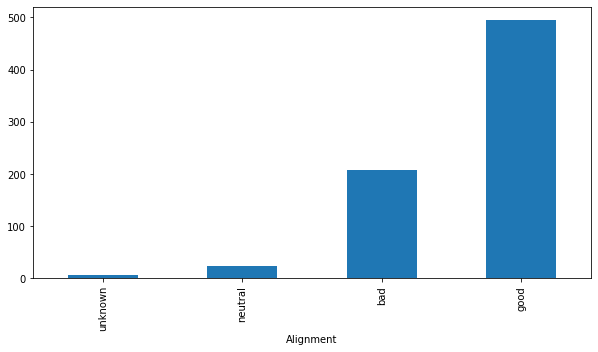

In [16]:
print(heroes_df['Alignment'].unique())
heroes_df['Alignment'].replace('-','unknown',inplace=True)
print(heroes_df['Alignment'].unique())
data = heroes_df.groupby('Alignment')['Alignment'].count().sort_values()
plt = data.plot(kind='bar',figsize=(10,5))
plt.plot()

[441.  65.  90. -99. 122.  88.  61.  81. 104. 108.  72. 169. 173. 101.
  68.  57.  54.  83.  86. 358. 135. 106. 146.  63.  98. 270.  59.  50.
 126.  67. 180.  77.  52.  95.  79. 133. 181. 216.  71. 124. 155. 113.
  58.  92.  97.  56. 230. 495.  55. 110.  99. 158.  74. 116.  62. 170.
  70.  78. 225. 817.  27.  91. 178. 383. 171. 187. 132.  89. 412. 306.
  80. 203.  96.  18.  45. 167.  16. 630. 268.  nan 115.   4.  48. 119.
 207. 191.   2.  14.  49. 855. 356. 324. 360. 288. 236.  36. 140. 128.
 338. 248. 125.  85. 293.  69. 405. 117.  87. 234. 320.  38.  25. 900.
 310. 149. 315. 153. 437. 131.  47. 176. 198. 443. 143.  76.  82. 105.
 331. 214.  73. 334.  41. 162.  39. 473.  51.  17.]
count    732.000000
mean      43.855191
std      130.823733
min      -99.000000
25%      -99.000000
50%       62.000000
75%       90.000000
max      900.000000
Name: Weight, dtype: float64


[]

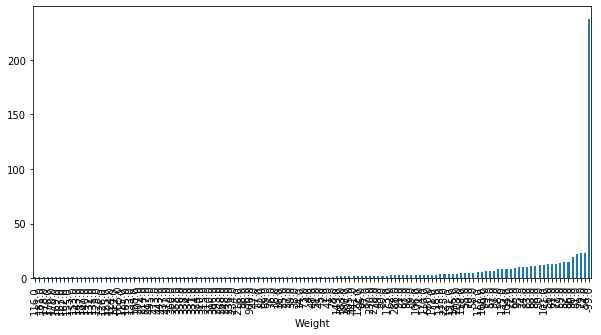

In [17]:
print(heroes_df['Weight'].unique())
print(heroes_df['Weight'].describe())

data = heroes_df.groupby('Weight')['Weight'].count().sort_values()
plt = data.plot(kind='bar', figsize=(10,5))
plt.plot()

In this case, it's going to be incredibly similar to how our previous methods worked with height. We'll be replacing -99 with nan, just to make it easier to work with for the future.

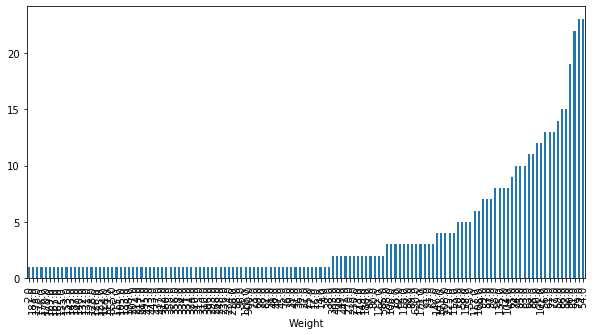

In [18]:
heroes_df['Weight'].replace(-99,np.nan,inplace=True)
data = heroes_df.groupby('Weight')['Weight'].count().sort_values()
plt = data.plot(kind='bar',figsize=(10,5))

In [19]:
heroes_df.isna().sum()

Name            0
Gender          0
Eye color     172
Race          304
Hair color    172
Height        217
Publisher      15
Skin color    662
Alignment       0
Weight        239
dtype: int64

Now that it's a bit easier to see what we're working with as far as missing values, we can safely drop the skin color column, as it is missing the majority of values, as well as the race column, as it is missing at least half of its values. We will also drop the lines with missing Eye color values to see if it resolves the Hair color missing values, as they seem to have corresponding numbers of missing values.

In [20]:
heroes_df.drop(['Skin color'],axis=1,inplace=True)
heroes_df.drop(['Race'],axis=1,inplace=True)
heroes_df.dropna(inplace=True)
heroes_df.isna().sum()

Name          0
Gender        0
Eye color     0
Hair color    0
Height        0
Publisher     0
Alignment     0
Weight        0
dtype: int64

In [21]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465 entries, 0 to 733
Data columns (total 8 columns):
Name          465 non-null object
Gender        465 non-null object
Eye color     465 non-null object
Hair color    465 non-null object
Height        465 non-null float64
Publisher     465 non-null object
Alignment     465 non-null object
Weight        465 non-null float64
dtypes: float64(2), object(6)
memory usage: 32.7+ KB


## Checking for Duplicates
First, we check for duplicates, as those can impact statistics in awkward ways.

In [22]:
duplicates = heroes_df[heroes_df.duplicated()]
print(len(duplicates))
duplicates.head()

0


,Name,Gender,Eye color,Hair color,Height,Publisher,Alignment,Weight


Initially, there was one line showing as a duplicate, however, it was removed during the data cleaning process.

# Powers DataFrame

## Cleaning Column Names
We'll follow a similar approach for the powers dataframe as well, however, it is structured a bit differently.

In [23]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [24]:
powers_df.set_index('hero_names', inplace=True)
heroes_df.set_index('Name', inplace=True)

In [25]:
heroes_df = heroes_df.join(powers_df, how='inner')
heroes_df.head()

,Gender,Eye color,Hair color,Height,Publisher,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
A-Bomb,Male,yellow,No Hair,203.0,Marvel Comics,good,441.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,No Hair,191.0,Dark Horse Comics,good,65.0,True,True,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,No Hair,185.0,DC Comics,good,90.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,No Hair,203.0,Marvel Comics,bad,441.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Absorbing Man,Male,blue,No Hair,193.0,Marvel Comics,bad,122.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
heroes_df.info()
heroes_df.reset_index()

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, A-Bomb to Zoom
Columns: 174 entries, Gender to Omniscient
dtypes: bool(167), float64(2), object(5)
memory usage: 99.3+ KB


,index,Gender,Eye color,Hair color,Height,Publisher,Alignment,Weight,Agility,Accelerated Healing,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,No Hair,203.0,Marvel Comics,good,441.0,False,True,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,No Hair,191.0,Dark Horse Comics,good,65.0,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,No Hair,185.0,DC Comics,good,90.0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,No Hair,203.0,Marvel Comics,bad,441.0,False,True,...,False,False,False,False,False,False,False,False,False,False
4,Absorbing Man,Male,blue,No Hair,193.0,Marvel Comics,bad,122.0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,Yellowjacket,Male,blue,Blond,183.0,Marvel Comics,good,83.0,False,False,...,False,False,False,False,False,False,False,False,False,False
436,Yellowjacket II,Female,blue,Strawberry Blond,165.0,Marvel Comics,good,52.0,False,False,...,False,False,False,False,False,False,False,False,False,False
437,Yoda,Male,brown,White,66.0,George Lucas,good,17.0,True,False,...,False,False,False,False,False,False,False,False,False,False
438,Zatanna,Female,blue,Black,170.0,DC Comics,good,57.0,False,False,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

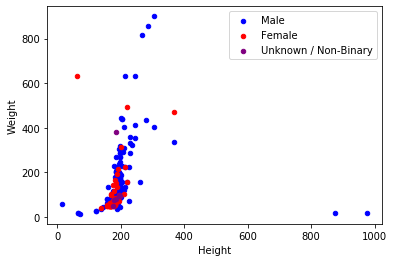

In [27]:
m_heroes_df = heroes_df[heroes_df['Gender'] == 'Male']
f_heroes_df = heroes_df[heroes_df['Gender'] == 'Female']
nb_heroes_df = heroes_df[heroes_df['Gender'] == 'Unknown / Non-Binary']


data = m_heroes_df.plot.scatter(x='Height',y='Weight', c='blue', label='Male') 
f_heroes_df.plot.scatter(x='Height', y='Weight', c='red', label='Female', ax = data) 
nb_heroes_df.plot.scatter(x='Height', y='Weight', c='purple', label = 'Unknown / Non-Binary', ax = data)

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [28]:
m_heroes_df = heroes_df[heroes_df['Gender'] == 'Male']
f_heroes_df = heroes_df[heroes_df['Gender'] == 'Female']
nb_heroes_df = heroes_df[heroes_df['Gender'] == 'Unknown / Non-Binary']

def show_distplot(dataframe, gender, column_name):
    plt.plot()
    dataframe[column_name].hist()
    plt.xlabel(column_name)
    plt.ylabel('Probability Density')
    plt.title('Distribution of {} for {} heroes'.format(column_name, gender))
    plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

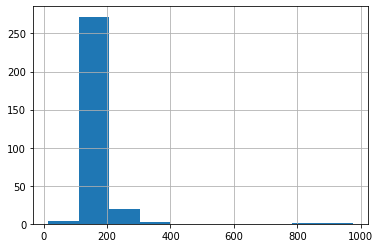

In [29]:
# Male Height
show_distplot(m_heroes_df, 'Male', 'Height')

In [ ]:
# Male Weight
show_distplot(m_heroes_df, 'Male', 'Weight')

In [ ]:
# Female Height
show_distplot(f_heroes_df, 'Female', 'Height')

In [ ]:
# Female Weight
show_distplot(f_heroes_df, 'Female', 'Weight')

In [ ]:
# Unknown Height
show_distplot(nb_heroes_df, 'Unknown / Non-Binary', 'Height')

In [ ]:
# Unknown Weight
show_distplot(nb_heroes_df, 'Unknown / Non-Binary', 'Weight')

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data